<a href="https://colab.research.google.com/github/kumarirakhi19/cardiovascular-risk-prediction/blob/main/Team_Cardiovascular_heart_diseases_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral
* Is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous) Predict variable (desired target)
10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

# data description

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/alma_better/capstone_project/Cardiovascular_Risk_Prediction/data_cardiovascular_risk.csv")

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.shape

(3390, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390,NaN,NaN,NaN,1694.5,978.753,0,847.25,1694.5,2541.75,3389
age,3390,NaN,NaN,NaN,49.5422,8.59288,32,42,49,56,70
education,3303,NaN,NaN,NaN,1.97094,1.01908,1,1,2,3,4
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368,NaN,NaN,NaN,9.06948,11.8791,0,0,0,20,70
BPMeds,3346,NaN,NaN,NaN,0.0298864,0.170299,0,0,0,0,1
prevalentStroke,3390,NaN,NaN,NaN,0.00648968,0.0803085,0,0,0,0,1
prevalentHyp,3390,NaN,NaN,NaN,0.315339,0.464719,0,0,0,1,1
diabetes,3390,NaN,NaN,NaN,0.0256637,0.158153,0,0,0,0,1


Checking For duplication of Data.

In [ ]:
df[df.duplicated()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


# Null value treatment

In [ ]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
df_copy = df.copy()

In [ ]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


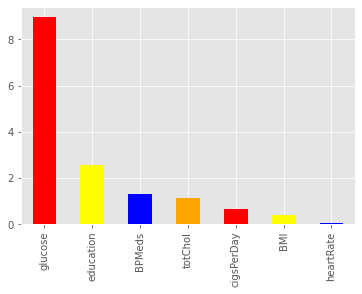

In [ ]:
round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2).plot(kind='bar', color=['red', 'yellow', 'blue', 'orange'])

Glucose

In the following column mean and median are nearby. we have fill the missing values so i am using median values for filling the missing values.

In [ ]:
df['glucose'].describe()

count    3086.000000
mean       82.086520
std        24.244753
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [ ]:
print('Glucose Feature Missing Before')
print(df_copy[['glucose']].isnull().sum())
print('--'*50)
df_copy['glucose']=df_copy['glucose'].fillna(df_copy['glucose'].median())
print('Glucose Feature Missing After')
print(df_copy[['glucose']].isnull().sum())
print('--'*50)

Glucose Feature Missing Before
glucose    304
dtype: int64
----------------------------------------------------------------------------------------------------
Glucose Feature Missing After
glucose    0
dtype: int64
----------------------------------------------------------------------------------------------------


Education

In [ ]:
df['education'].describe()

count    3303.000000
mean        1.970936
std         1.019081
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64

Education feature is not a continues variable so we using Mode for filling the missing values.

In [ ]:
print('Education Feature Missing Before')
print(df_copy[['education']].isnull().sum())
print('--'*50)
df_copy['education']=df_copy['education'].fillna(df_copy['education'].mode()[0])
print('Education Feature Missing After')
print(df_copy[['education']].isnull().sum())
print('--'*50)

Education Feature Missing Before
education    87
dtype: int64
----------------------------------------------------------------------------------------------------
Education Feature Missing After
education    0
dtype: int64
----------------------------------------------------------------------------------------------------


BPMeds

In [ ]:
df['BPMeds'].describe()

count    3346.000000
mean        0.029886
std         0.170299
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [ ]:
df['BPMeds'].unique()

array([ 0., nan,  1.])

In [ ]:
print('BPMeds Feature Missing Before')
print(df_copy[['BPMeds']].isnull().sum())
print('--'*50)
df_copy['BPMeds']=df_copy['BPMeds'].fillna(df_copy['BPMeds'].mode()[0])
print('BPMeds Feature Missing After')
print(df_copy[['BPMeds']].isnull().sum())
print('--'*50)

BPMeds Feature Missing Before
BPMeds    44
dtype: int64
----------------------------------------------------------------------------------------------------
BPMeds Feature Missing After
BPMeds    0
dtype: int64
----------------------------------------------------------------------------------------------------


Total Cholostral

In [ ]:
df['totChol'].describe()

count    3352.000000
mean      237.074284
std        45.247430
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

In [ ]:
print('Total colostrol Feature Missing Before')
print(df_copy[['totChol']].isnull().sum())
print('--'*50)
df_copy['totChol']=df_copy['totChol'].fillna(df['totChol'].median())
print('Total colostrol Feature Missing After')
print(df_copy[['totChol']].isnull().sum())
print('--'*50)

Total colostrol Feature Missing Before
totChol    38
dtype: int64
----------------------------------------------------------------------------------------------------
Total colostrol Feature Missing After
totChol    0
dtype: int64
----------------------------------------------------------------------------------------------------


Cigrates per Day

In [ ]:
df['cigsPerDay'].describe()

count    3368.000000
mean        9.069477
std        11.879078
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [ ]:
print('Cigars per day Feature Missing Before')
print(df_copy[['cigsPerDay']].isnull().sum())
print('--'*50)
df_copy['cigsPerDay']=df_copy['cigsPerDay'].fillna(df['cigsPerDay'].median())
print('Cigars per day Feature Missing After')
print(df_copy[['cigsPerDay']].isnull().sum())
print('--'*50)

Cigars per day Feature Missing Before
cigsPerDay    22
dtype: int64
----------------------------------------------------------------------------------------------------
Cigars per day Feature Missing After
cigsPerDay    0
dtype: int64
----------------------------------------------------------------------------------------------------


Body Mass Index(BMI)

In [ ]:
df['BMI'].describe()

count    3376.000000
mean       25.794964
std         4.115449
min        15.960000
25%        23.020000
50%        25.380000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [ ]:
print('BMI Feature Missing Before')
print(df_copy[['BMI']].isnull().sum())
print('--'*50)
df_copy['BMI']=df_copy['BMI'].fillna(df['BMI'].median())
print('BMI Feature Missing After')
print(df_copy[['BMI']].isnull().sum())
print('--'*50)

BMI Feature Missing Before
BMI    14
dtype: int64
----------------------------------------------------------------------------------------------------
BMI Feature Missing After
BMI    0
dtype: int64
----------------------------------------------------------------------------------------------------


Heart rate

In [ ]:
df_copy['heartRate'].describe()

count    3389.000000
mean       75.977279
std        11.971868
min        45.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [ ]:
print('Heart Rate Feature Missing Before')
print(df_copy[['heartRate']].isnull().sum())
print('--'*50)
df_copy['heartRate']=df_copy['heartRate'].fillna(df['heartRate'].median())
print('Heart Rate Feature Missing After')
print(df_copy[['heartRate']].isnull().sum())
print('--'*50)

Heart Rate Feature Missing Before
heartRate    1
dtype: int64
----------------------------------------------------------------------------------------------------
Heart Rate Feature Missing After
heartRate    0
dtype: int64
----------------------------------------------------------------------------------------------------


Null valuve after treatment

In [ ]:
df_copy.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#univariant analysis

In [ ]:
#size of graph
plt.rcParams["figure.figsize"] = [10,6]

##column 2: age 

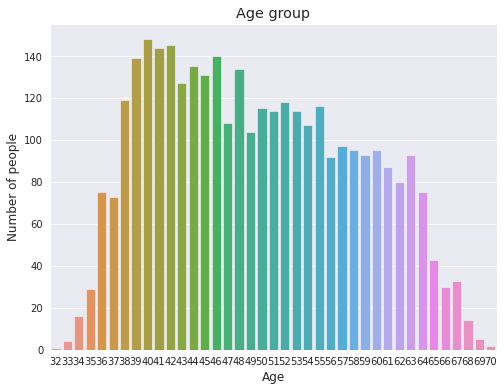

In [ ]:
sns.countplot(df_copy.age)
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Age group")
plt.show()

##coloum 3: education

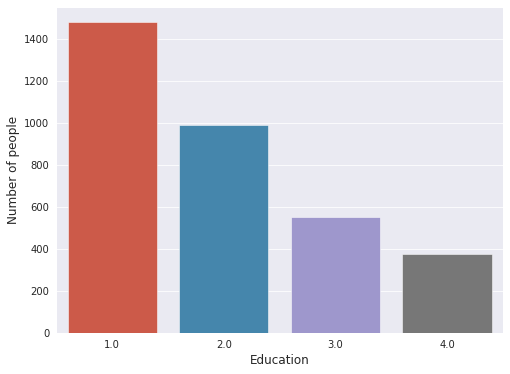

In [ ]:
sns.countplot(df_copy.education)
plt.xlabel("Education")
plt.ylabel("Number of people")
plt.show()

##column : is smoking

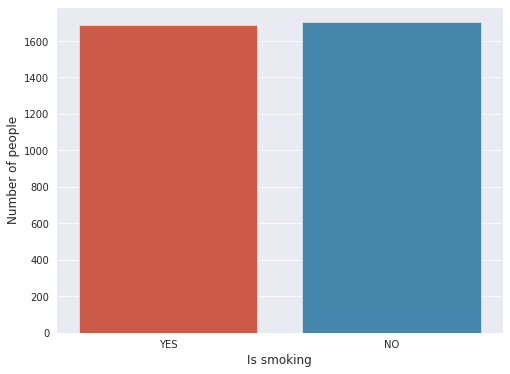

In [ ]:
sns.countplot(df_copy.is_smoking)
plt.xlabel("Is smoking")
plt.ylabel("Number of people")
plt.show()

##column 4: CigsperDay

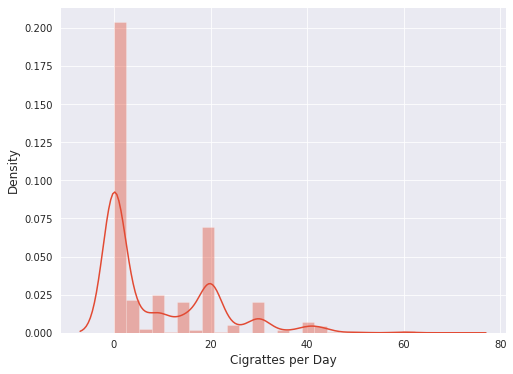

In [ ]:
sns.distplot(df_copy.cigsPerDay)
plt.xlabel("Cigrattes per Day")
#plt.ylabel("Number of people")
plt.show()

After log treatment

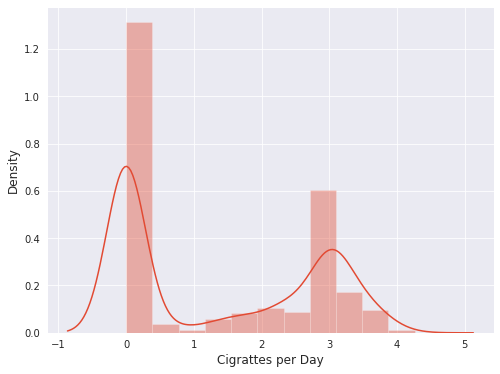

In [ ]:
sns.distplot(np.log1p(df_copy.cigsPerDay))
plt.xlabel("Cigrattes per Day")
#plt.ylabel("Number of people")
plt.show()

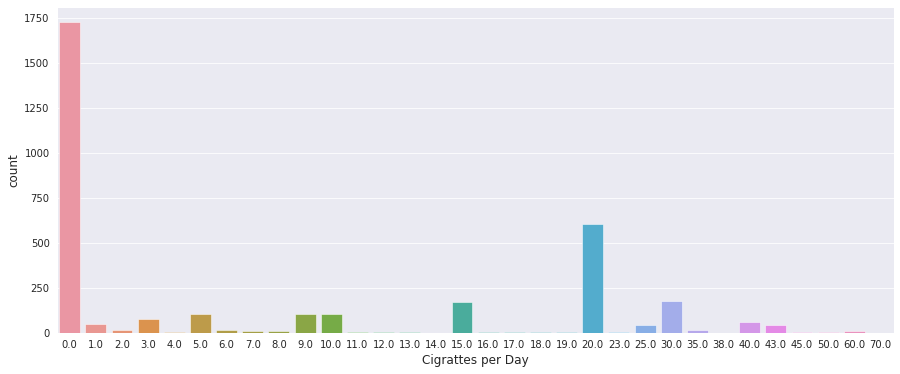

In [ ]:
plt.rcParams["figure.figsize"] = [15,6]
sns.countplot(df_copy.cigsPerDay)
plt.xlabel("Cigrattes per Day")
#plt.ylabel("Number of people")
plt.show()

##coloumn 5: BPmeds

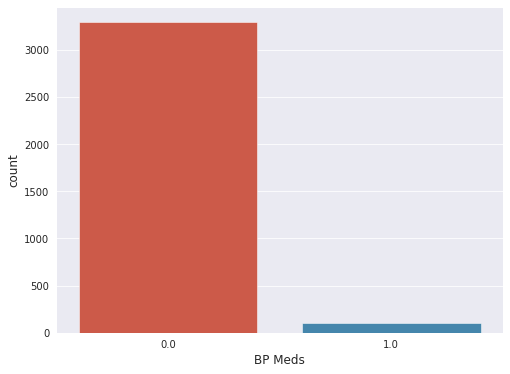

In [ ]:
plt.rcParams["figure.figsize"] = [8,6]
sns.countplot(df_copy.BPMeds)
plt.xlabel("BP Meds")
plt.show()

##column 6: Prevalent Strokes

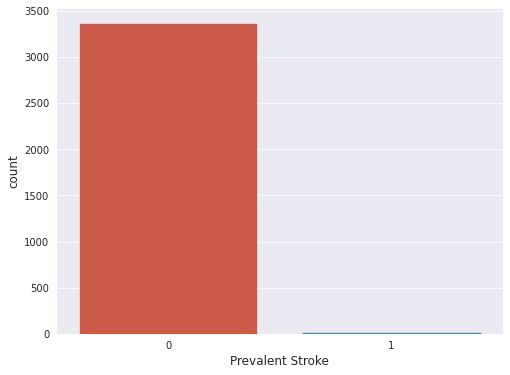

In [ ]:
sns.countplot(df_copy.prevalentStroke)
plt.xlabel("Prevalent Stroke")
plt.show()

##column 7: Prevalent hyp

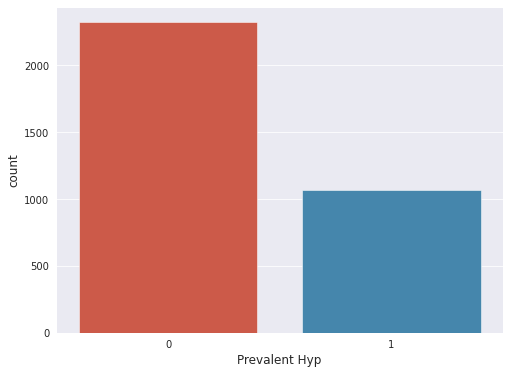

In [ ]:
sns.countplot(df_copy.prevalentHyp)
plt.xlabel("Prevalent Hyp")
plt.show()

##columns 8: Diabetes

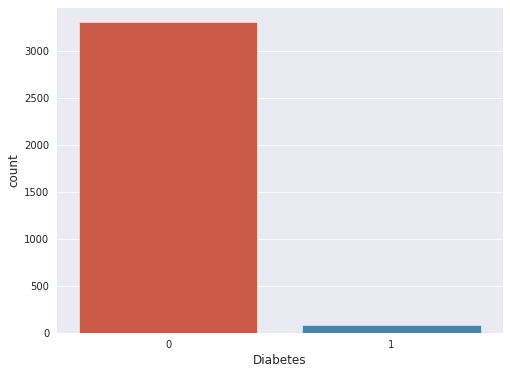

In [ ]:
sns.countplot(df_copy.diabetes)
plt.xlabel("Diabetes")
plt.show()

## Columns 9: totChol

In [ ]:
df_copy.totChol.describe([0.50,0.75,0.90,0.95,0.99])

count    3390.000000
mean      237.039823
std        44.994205
min       107.000000
50%       234.000000
75%       264.000000
90%       292.000000
95%       313.000000
99%       355.110000
max       696.000000
Name: totChol, dtype: float64

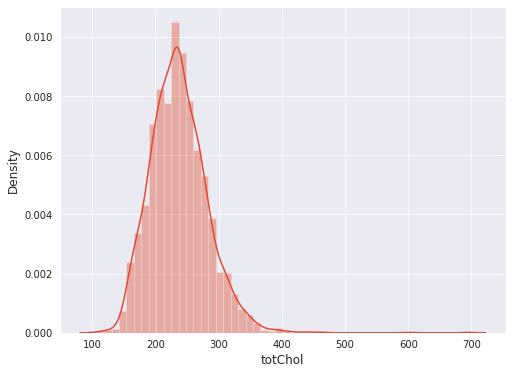

In [ ]:
sns.distplot(df_copy.totChol )
plt.xlabel("totChol")
plt.show()

##column 9: sysBP

In [ ]:
df_copy.sysBP.describe([0.50,0.75,0.90,0.95,0.99])

count    3390.00000
mean      132.60118
std        22.29203
min        83.50000
50%       128.50000
75%       144.00000
90%       162.50000
95%       175.27500
99%       202.05500
max       295.00000
Name: sysBP, dtype: float64

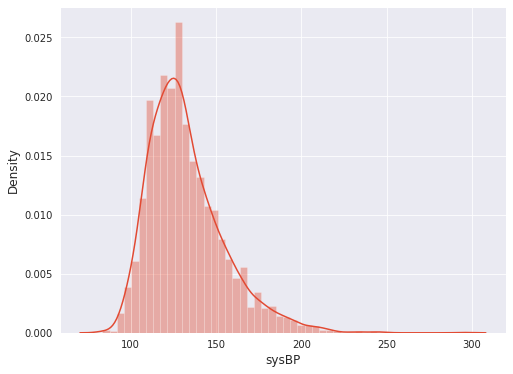

In [ ]:
sns.distplot(df_copy.sysBP )
plt.xlabel("sysBP")
plt.show()

##columns 10: diaBP

In [ ]:
df_copy.diaBP.describe([0.50,0.75,0.90,0.95,0.99])

count    3390.000000
mean       82.883038
std        12.023581
min        48.000000
50%        82.000000
75%        90.000000
90%        98.000000
95%       105.000000
99%       119.110000
max       142.500000
Name: diaBP, dtype: float64

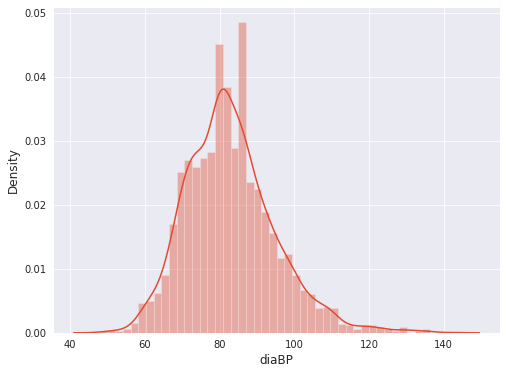

In [ ]:
sns.distplot(df_copy.diaBP )
plt.xlabel("diaBP")
plt.show()

##coloumn 11: BMI

In [ ]:
df_copy.BMI.describe([0.50,0.75,0.90,0.95,0.99])

count    3390.000000
mean       25.793251
std         4.107026
min        15.960000
50%        25.380000
75%        27.997500
90%        30.851000
95%        32.840000
99%        38.835400
max        56.800000
Name: BMI, dtype: float64

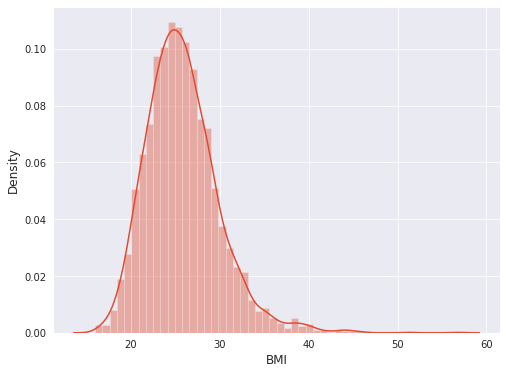

In [ ]:
sns.distplot(df_copy.BMI )
plt.xlabel("BMI")
plt.show()

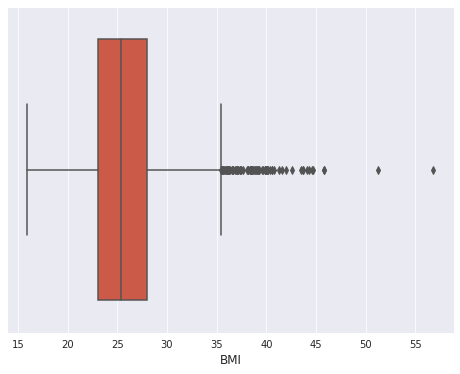

In [ ]:
sns.boxplot(df_copy.BMI )
plt.xlabel("BMI")
plt.show()

##column 12: HeartRate

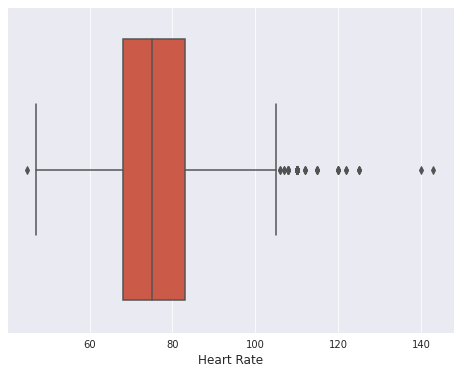

In [ ]:
sns.boxplot(df_copy.heartRate )
plt.xlabel("Heart Rate")
plt.show()

In [ ]:
df_copy.heartRate.describe([0.50,0.75,0.90,0.95,0.99])

count    3390.000000
mean       75.976991
std        11.970114
min        45.000000
50%        75.000000
75%        83.000000
90%        92.000000
95%        98.000000
99%       110.000000
max       143.000000
Name: heartRate, dtype: float64

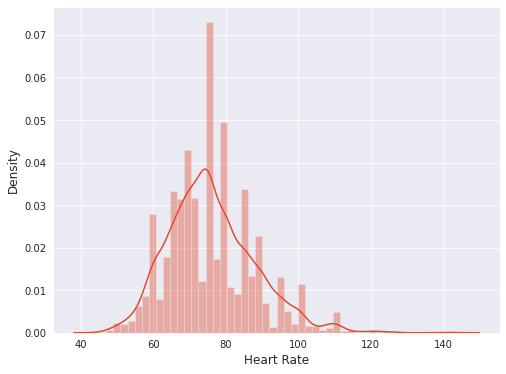

In [ ]:
sns.distplot(df_copy.heartRate )
plt.xlabel("Heart Rate")
plt.show()

##column 13: Glucose

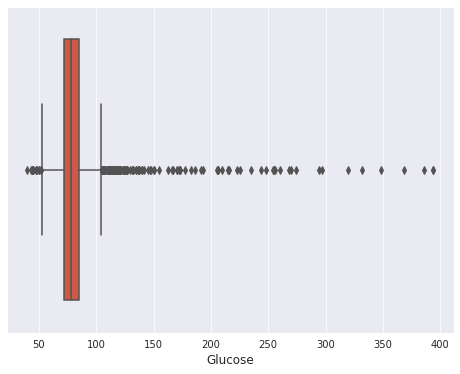

In [ ]:
sns.boxplot(df_copy.glucose )
plt.xlabel("Glucose")
plt.show()

In [ ]:
df_copy.glucose.describe([0.50,0.75,0.90,0.95,0.99])

count    3390.000000
mean       81.720059
std        23.161265
min        40.000000
50%        78.000000
75%        85.000000
90%        97.000000
95%       108.000000
99%       173.000000
max       394.000000
Name: glucose, dtype: float64

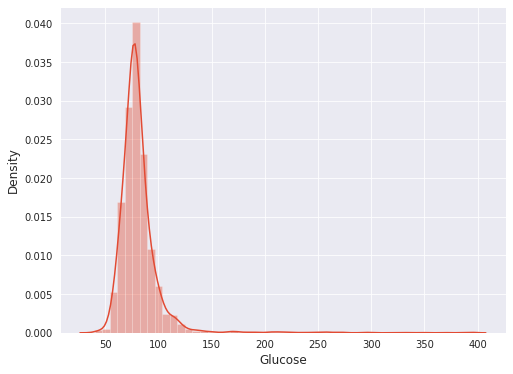

In [ ]:
sns.distplot(df_copy.glucose)
plt.xlabel("Glucose")
plt.show()

##column 14: TenyearCHD

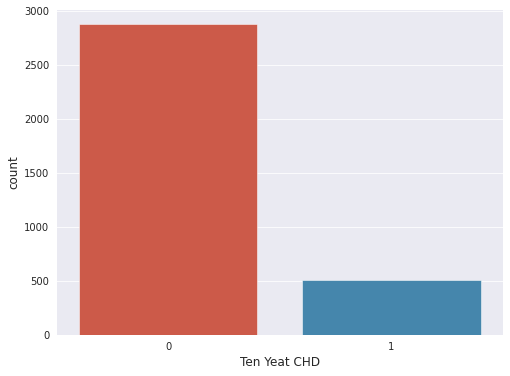

In [ ]:
sns.countplot(df_copy.TenYearCHD)
plt.xlabel("Ten Yeat CHD")
plt.show()

#bivariant analysis

## Age Vs TenYearCHD

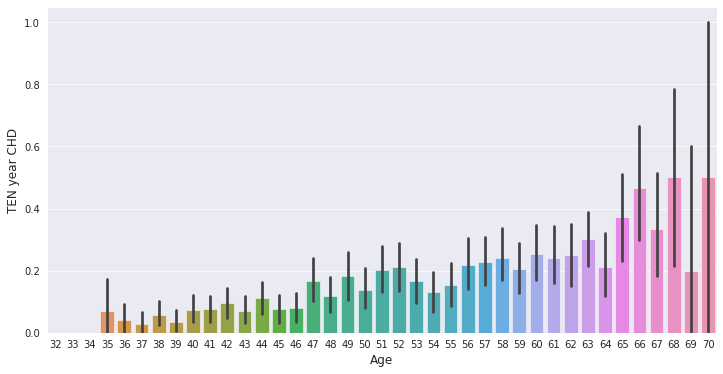

In [ ]:
sns.set_style(style='darkgrid')
plt.figure(figsize = (12,6))
sns.barplot(df_copy.age,df_copy.TenYearCHD)
plt.xlabel('Age')
plt.ylabel('TEN year CHD')
plt.show()

## educaation Vs Ten Year CHD

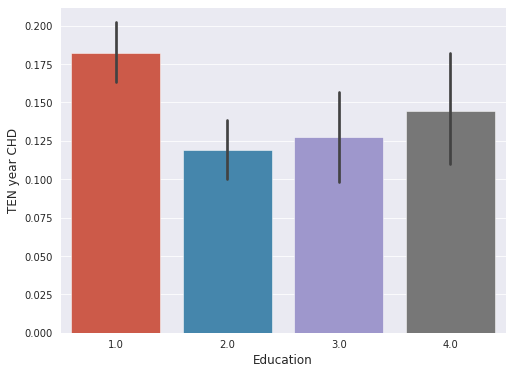

In [ ]:


sns.barplot(df_copy.education,df_copy.TenYearCHD)
plt.xlabel('Education')
plt.ylabel('TEN year CHD')
plt.show()



## sex Vs Ten Year CHD

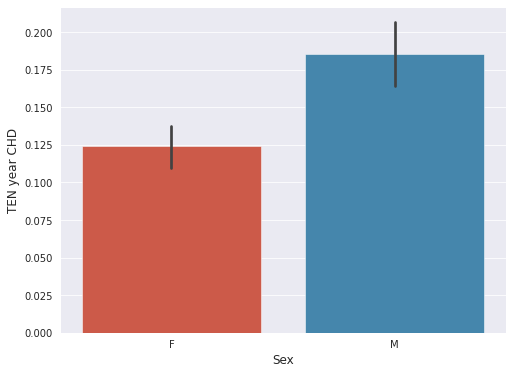

In [ ]:
sns.barplot(df_copy.sex,df_copy.TenYearCHD)
plt.xlabel('Sex')
plt.ylabel('TEN year CHD')
plt.show()

## is_smoking Vs Ten year CHD

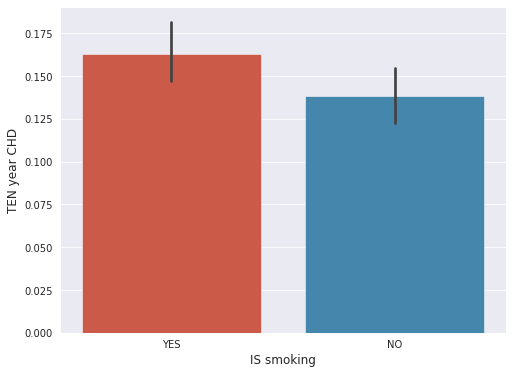

In [ ]:
sns.barplot(df_copy.is_smoking,df_copy.TenYearCHD)
plt.xlabel('IS smoking')
plt.ylabel('TEN year CHD')
plt.show()

##cigratesperday Vs Ten year CHD

Text(0.5, 1.0, 'Line Plot')

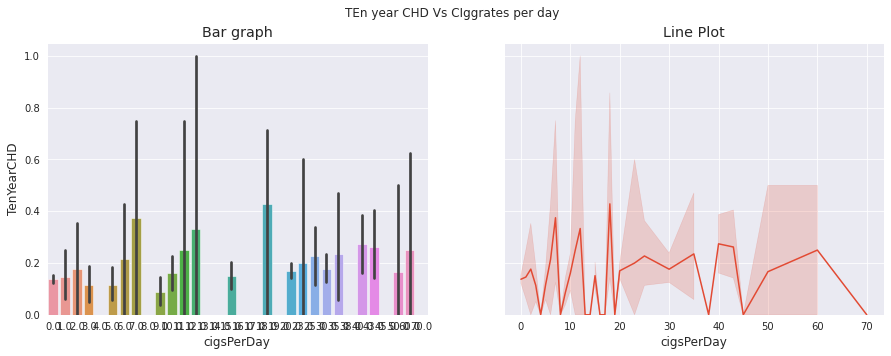

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('TEn year CHD Vs CIggrates per day')

sns.barplot(ax=axes[0], x='cigsPerDay',y='TenYearCHD',data=df_copy)
axes[0].set_title('Bar graph')

sns.lineplot(ax=axes[1],  x='cigsPerDay',y='TenYearCHD',data=df_copy)
axes[1].set_title('Line Plot')

## BPMeds Vs TenYearCHD

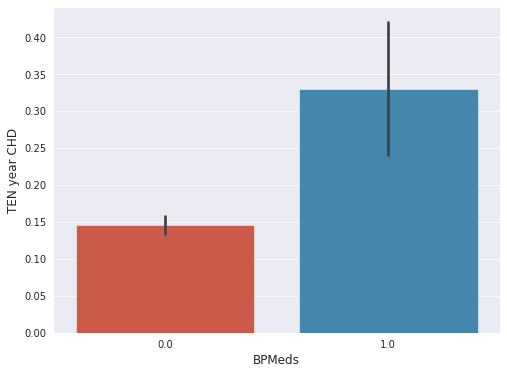

In [ ]:


df.columns

sns.barplot(df_copy.BPMeds,df_copy.TenYearCHD)
plt.xlabel('BPMeds')
plt.ylabel('TEN year CHD')
plt.show()

## prevalentStrokes Vs TenYearCHD

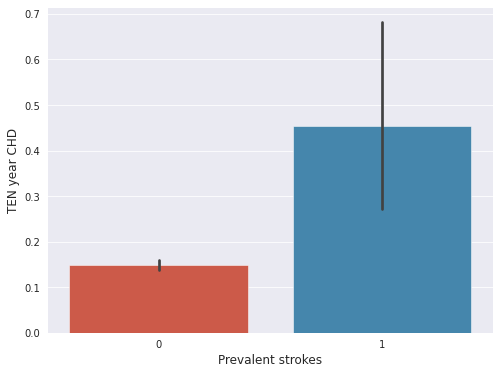

In [ ]:


sns.barplot(df_copy.prevalentStroke,df_copy.TenYearCHD)
plt.xlabel('Prevalent strokes')
plt.ylabel('TEN year CHD')
plt.show()

##prevalentHyp Vs TenYearCHD

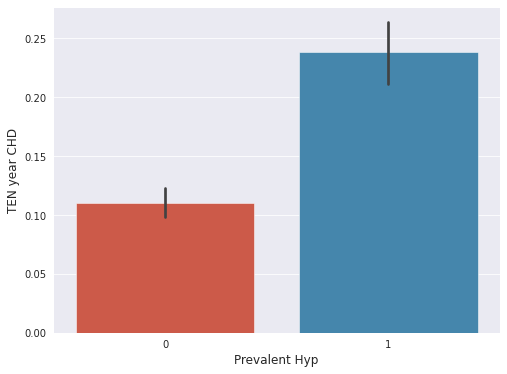

In [ ]:


sns.barplot(df_copy.prevalentHyp,df_copy.TenYearCHD)
plt.xlabel('Prevalent Hyp')
plt.ylabel('TEN year CHD')
plt.show()

##diabetes Vs TenYearCHD

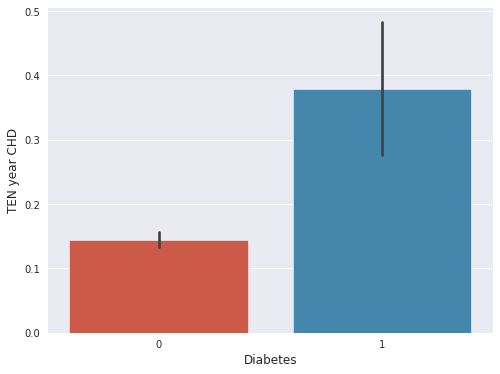

In [ ]:


sns.barplot(df_copy.diabetes,df_copy.TenYearCHD)
plt.xlabel('Diabetes')
plt.ylabel('TEN year CHD')
plt.show()

## TOTChol Vs TenYearCHD


Text(0.5, 1.0, 'Line Plot')

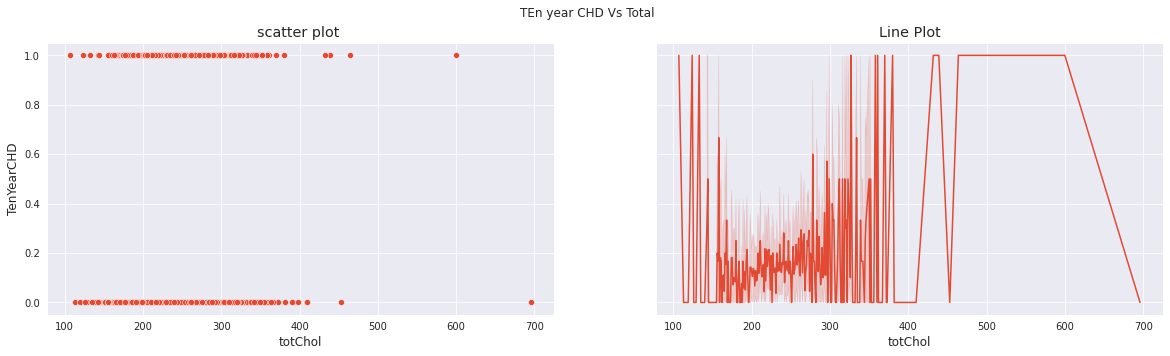

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('TEn year CHD Vs Total')

sns.scatterplot(ax=axes[0], x='totChol',y='TenYearCHD',data=df_copy)
axes[0].set_title('scatter plot ')

sns.lineplot(ax=axes[1],  x='totChol',y='TenYearCHD',data=df_copy)
axes[1].set_title('Line Plot')

##sysBP Vs TenYearCHD

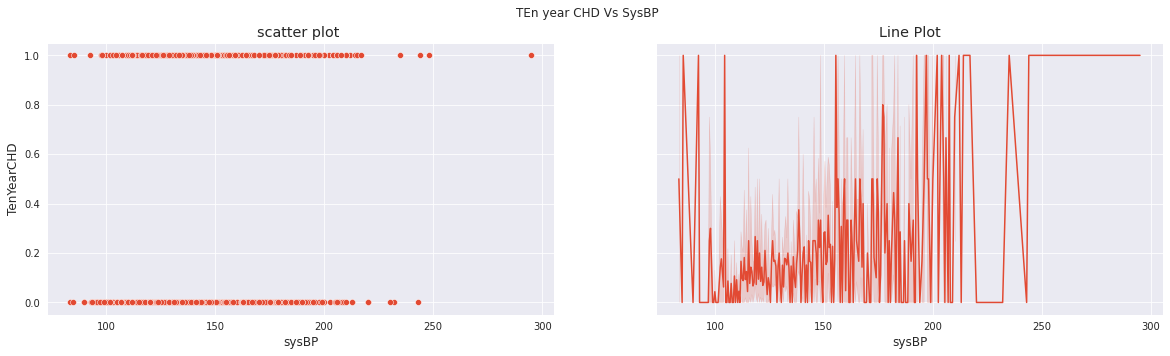

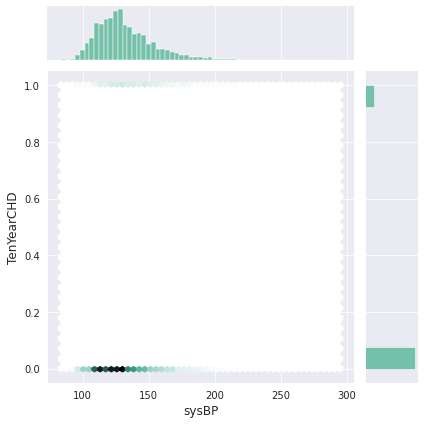

In [ ]:


df.sysBP.describe()

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('TEn year CHD Vs SysBP')

sns.scatterplot(ax=axes[0], x='sysBP',y='TenYearCHD',data=df_copy)
axes[0].set_title('scatter plot ')

sns.lineplot(ax=axes[1],  x='sysBP',y='TenYearCHD',data=df_copy)
axes[1].set_title('Line Plot')

sns.jointplot(x=df.sysBP, y=df.TenYearCHD, kind="hex", color="#4CB391")


##diaBP Vs TenYearCHD

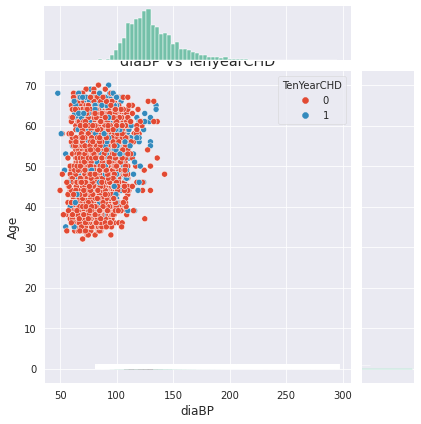

In [ ]:


sns.jointplot(x=df_copy.sysBP, y=df_copy.TenYearCHD, kind="hex", color="#4CB391")
plt.title('joint plot ')

sns.scatterplot(x = "diaBP", y = "age",data=df_copy, hue='TenYearCHD')
plt.xlabel('diaBP')
plt.ylabel('Age')
plt.title("diaBP Vs TenyearCHD")
plt.show()

##BMI Vs TenYearCHD

Text(0.5, 1.0, 'Line Plot')

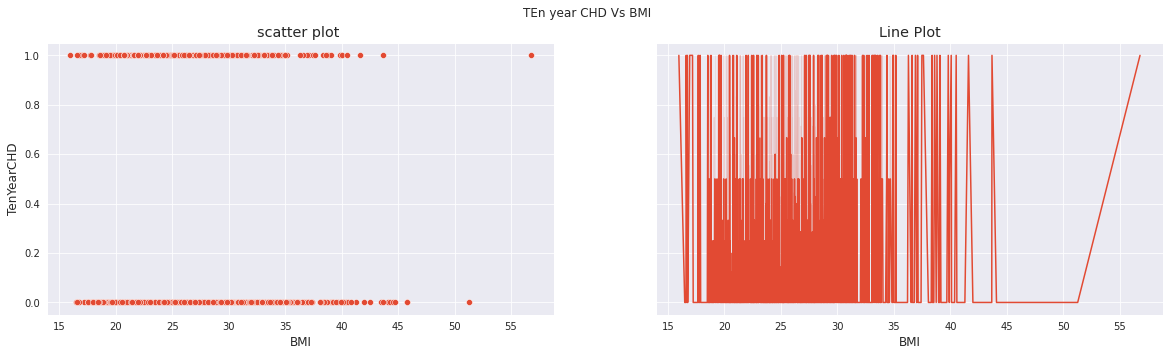

In [ ]:


fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('TEn year CHD Vs BMI')

sns.scatterplot(ax=axes[0], x='BMI',y='TenYearCHD',data=df_copy)
axes[0].set_title('scatter plot ')

sns.lineplot(ax=axes[1],  x='BMI',y='TenYearCHD',data=df_copy)
axes[1].set_title('Line Plot')

##BMI Vs TenYearCHD

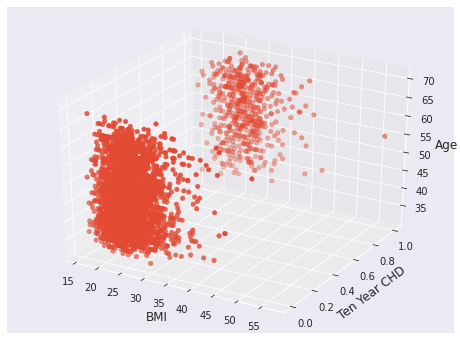

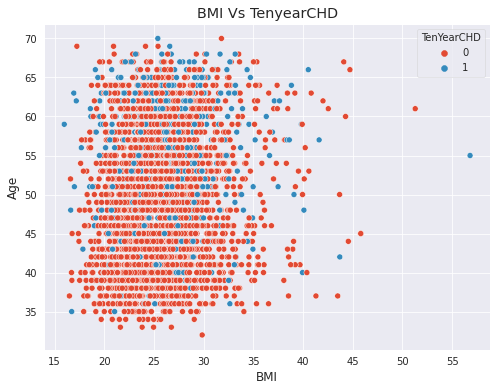

In [ ]:


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


ax.scatter(df_copy.BMI, df_copy.TenYearCHD, df_copy.age)
ax.set_xlabel("BMI")
ax.set_ylabel("Ten Year CHD")
ax.set_zlabel("Age")

plt.show()


sns.scatterplot(x = "BMI", y = "age",data=df_copy, hue='TenYearCHD')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title("BMI Vs TenyearCHD")
plt.show()

## heartRate Vs TenYearCHD

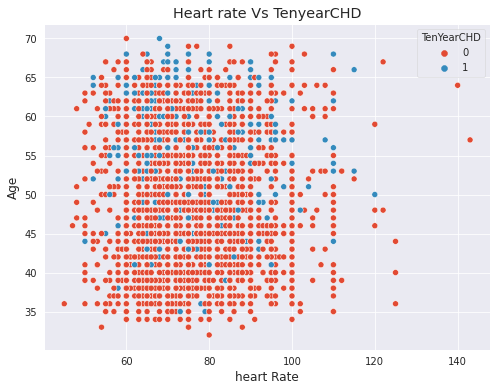

In [ ]:


sns.scatterplot(x = "heartRate", y = "age",data=df_copy, hue='TenYearCHD')
plt.xlabel('heart Rate')
plt.ylabel('Age')
plt.title("Heart rate Vs TenyearCHD")
plt.show()

##  Glucose Vs TenYearCHD

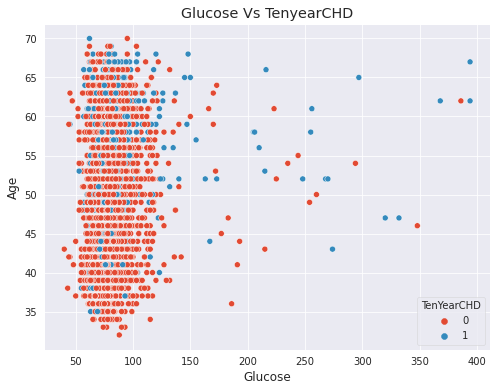

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:


sns.scatterplot(x = "glucose", y = "age",data=df_copy, hue='TenYearCHD')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.title("Glucose Vs TenyearCHD")
plt.show()

df.columns

# Corealtion

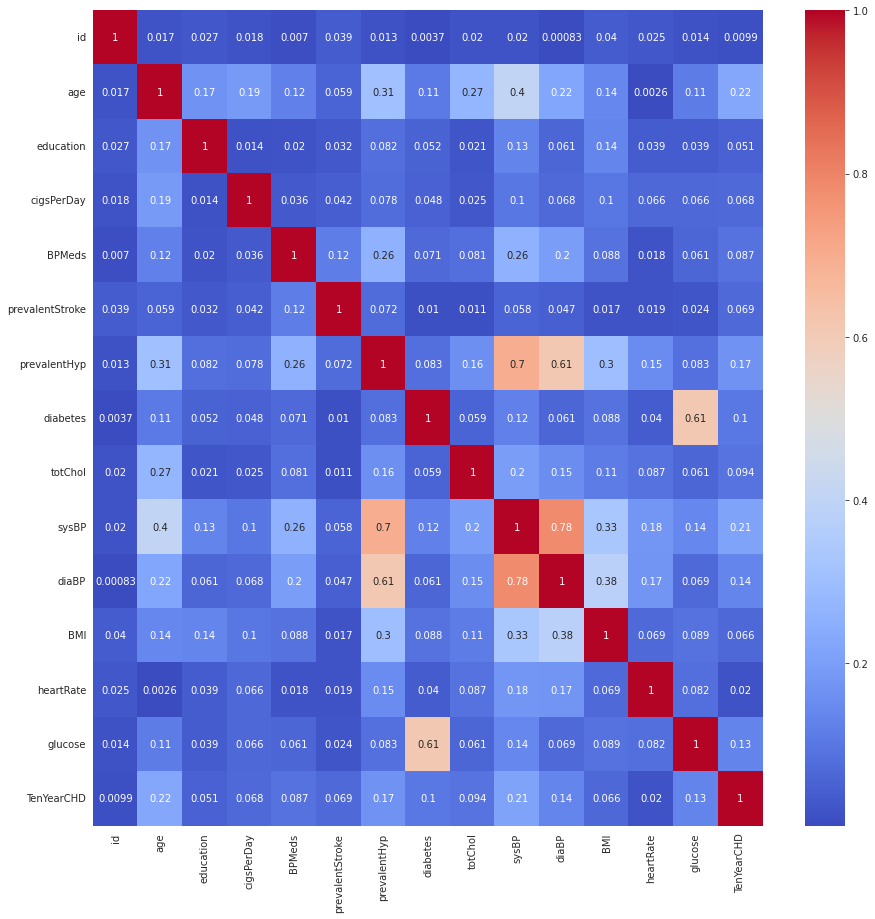

In [ ]:
 ## Correlation
plt.figure(figsize=(15,15))
correlation = df_copy.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

# label encoding and feature selection

In [ ]:
le=LabelEncoder()
df_copy['sex']=le.fit_transform(df_copy['sex'])
df_copy['is_smoking']=le.fit_transform(df_copy['is_smoking'])

In [ ]:
df_copy.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df_copy.drop(['id'],axis=1,inplace=True) #Id is not useful for Model training.

In [ ]:
final_data = df_copy.copy()

In [ ]:
# One hot encoding
final_data = pd.get_dummies(df_copy, columns=["education", "cigsPerDay"])

In [ ]:
final_data.head()

,age,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,cigsPerDay_0.0,cigsPerDay_1.0,cigsPerDay_2.0,cigsPerDay_3.0,cigsPerDay_4.0,cigsPerDay_5.0,cigsPerDay_6.0,cigsPerDay_7.0,cigsPerDay_8.0,cigsPerDay_9.0,cigsPerDay_10.0,cigsPerDay_11.0,cigsPerDay_12.0,cigsPerDay_13.0,cigsPerDay_14.0,cigsPerDay_15.0,cigsPerDay_16.0,cigsPerDay_17.0,cigsPerDay_18.0,cigsPerDay_19.0,cigsPerDay_20.0,cigsPerDay_23.0,cigsPerDay_25.0,cigsPerDay_30.0,cigsPerDay_35.0,cigsPerDay_38.0,cigsPerDay_40.0,cigsPerDay_43.0,cigsPerDay_45.0,cigsPerDay_50.0,cigsPerDay_60.0,cigsPerDay_70.0
0,64,0,1,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,36,1,0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,46,0,1,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,50,1,1,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,64,0,1,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
final_data.shape

(3390, 50)

Now we see corelation heatmap between each feature to choose best feature.

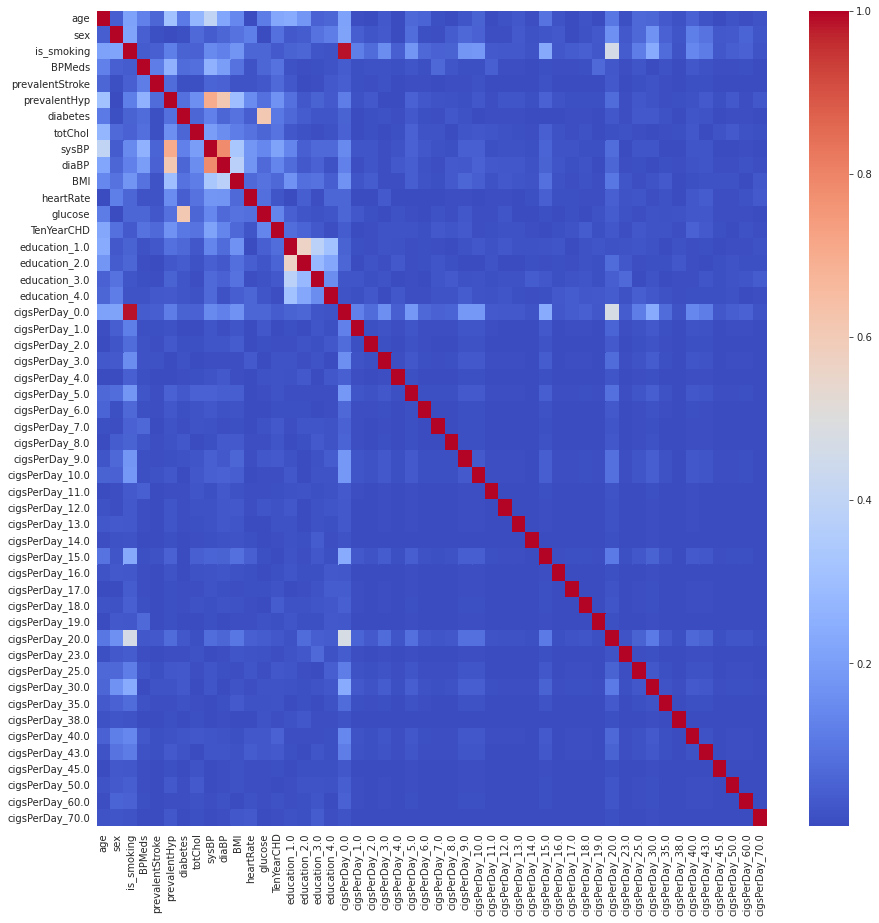

In [ ]:
## Correlation
plt.figure(figsize=(15,15))
correlation_1 = final_data.corr()
sns.heatmap(abs(correlation_1), cmap='coolwarm')
plt.show()

#splitting data into train and test

In [ ]:
# Data for all the independent variables
X = final_data.drop(labels='TenYearCHD',axis=1)

# Data for the dependent variable
y = final_data['TenYearCHD']

In [ ]:
print(f'dimension of independent variable X is {X.shape}')
print(f'dimension of dependent variable Y is {y.shape}')

dimension of independent variable X is (3390, 49)
dimension of dependent variable Y is (3390,)


## data imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2)
X_sm, y_sm = smote.fit_resample(X, y)

In [ ]:
y_sm=pd.DataFrame(y_sm)

In [ ]:
y_sm.value_counts()

TenYearCHD
1             2879
0             2879
dtype: int64

##spilt data

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X_sm,y_sm , test_size = 0.2, random_state = 0) 
print(f'dimension of train set {X_train.shape}')
print(f'dimension of test set {X_test.shape}')

dimension of train set (4606, 49)
dimension of test set (1152, 49)


In [ ]:
print(f'dimension of y_train set {y_train.shape}')
print(f'dimension of Y_test set {y_test.shape}')

dimension of y_train set (4606, 1)
dimension of Y_test set (1152, 1)


# model building

## logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept=True,max_iter=10000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Get the predicted probabilities
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8703864524533218
The accuracy on test data is  0.8524305555555556


[[2243   83]
 [ 514 1766]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

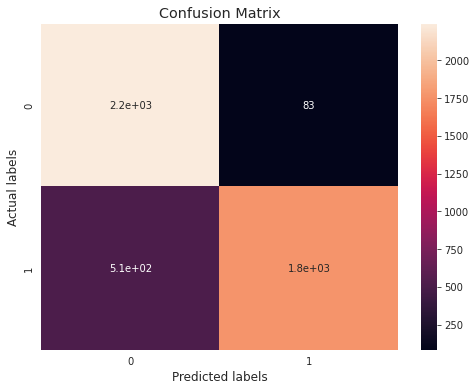

In [ ]:
# Get the confusion matrix for  train 

labels = ['0', '1']
cm = confusion_matrix(y_train, train_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[527  26]
 [144 455]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

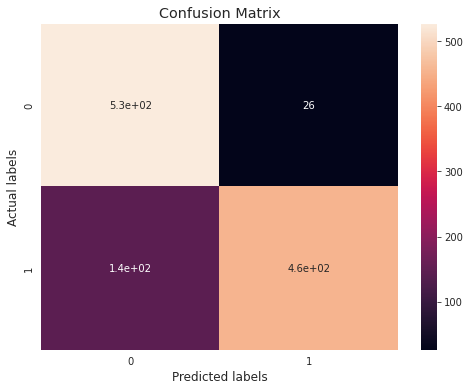

In [ ]:
# Get the confusion matrix for  test

labels = ['0', '1']
cm = confusion_matrix(y_test, test_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
y_lr_predict_pro=lr.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_lr_predict_pro)

In [ ]:
print(f'Logistic ROC AUC {roc_auc_score(y_test,y_lr_predict_pro)}')

Logistic ROC AUC 0.918969832179612


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, test_preds)

0.8425925925925926

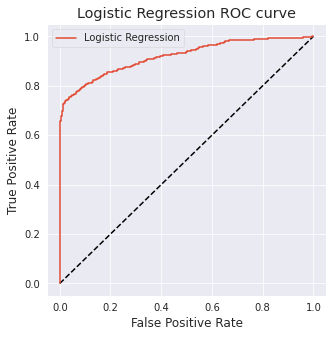

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_lr,tpr_lr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.legend()
plt.show()

## Decision Tree Classifier

In [ ]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(round(dt_classifier.score(X_test, y_test),2))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

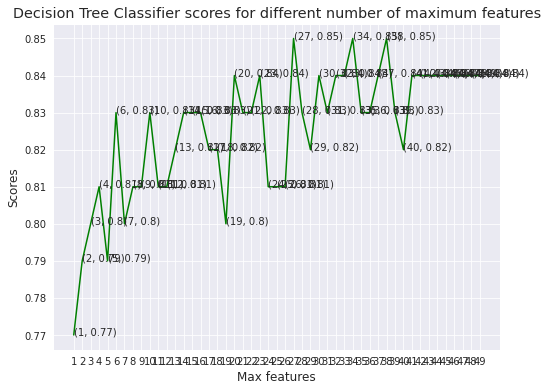

In [ ]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [ ]:
y_dt_predict_pro=dt_classifier.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_dt_predict_pro)

In [ ]:
roc_auc_score(y_test,y_dt_predict_pro)

0.8426657448973125

In [ ]:
f1_score(y_test,y_dt_predict_pro)

0.8487886382623225

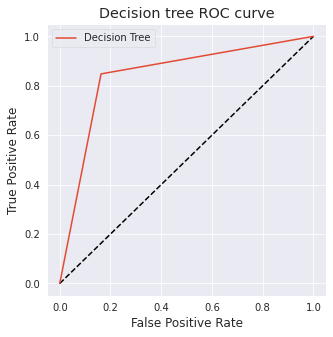

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_dt,tpr_dt, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision tree ROC curve')
plt.legend()
plt.show()

In [ ]:
features = X.columns
importances = dt_classifier.feature_importances_
indices = np.argsort(importances)

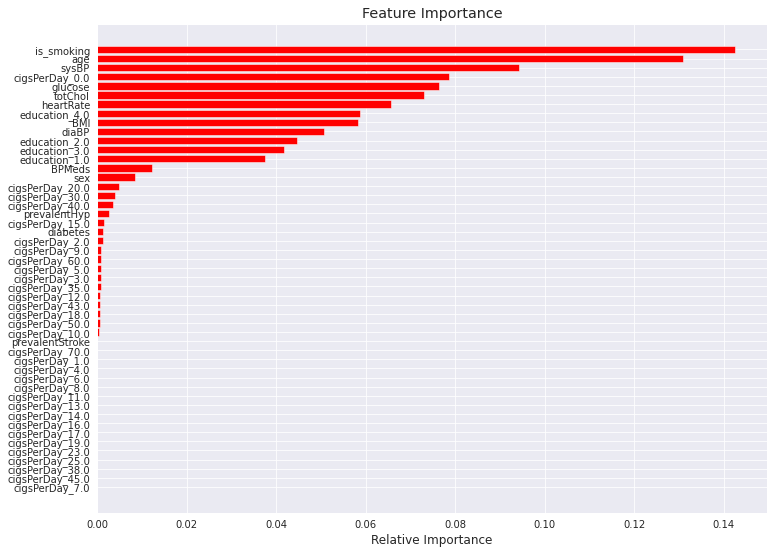

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Random forest

In [ ]:
classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 65, 80, 95,120], 'max_depth':[3, 5, 7,9,12]}
GSclassifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
GSclassifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 12],
                         'n_estimators': [50, 65, 80, 95, 120]},
             scoring='roc_auc')

In [ ]:
bestvalues=GSclassifier.best_params_
GSclassifier.best_params_


{'max_depth': 12, 'n_estimators': 95}

In [ ]:
classifier = RandomForestClassifier(max_depth=bestvalues['max_depth'],n_estimators=bestvalues['n_estimators']) # For GBM, use GradientBoostingClassifier()

classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=95)

In [ ]:
y_train_preds_rf =  classifier.predict(X_train)
y_test_preds_rf= classifier.predict(X_test)

In [ ]:
# Obtain accuracy on train set
accuracy_score(y_train,y_train_preds_rf)

0.9650455927051672

In [ ]:
# Obtain accuracy on test set
accuracy_score(y_test,y_test_preds_rf)

0.8645833333333334

In [ ]:
y_rf_predict_pro=classifier.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_rf_predict_pro)

In [ ]:
roc_auc_score(y_test,y_rf_predict_pro)

0.9493489752360023

In [ ]:
f1_score(y_test,y_rf_predict_pro)

ValueError: ignored

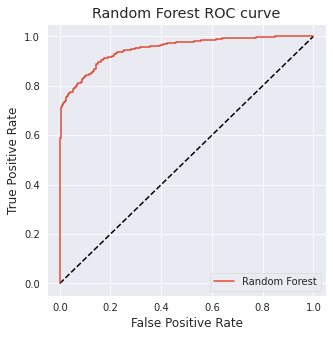

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rf,tpr_rf, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.legend()
plt.show()

In [ ]:
features = X.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

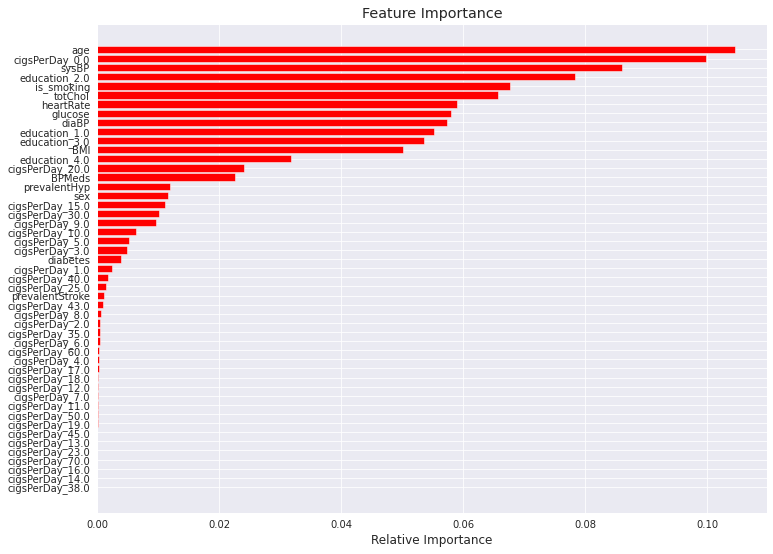

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## KNN

In [ ]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_sm,y_sm)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
bestPermet=knn_cv.best_params_
knn_cv.best_params_

{'n_neighbors': 2}

In [ ]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,30)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

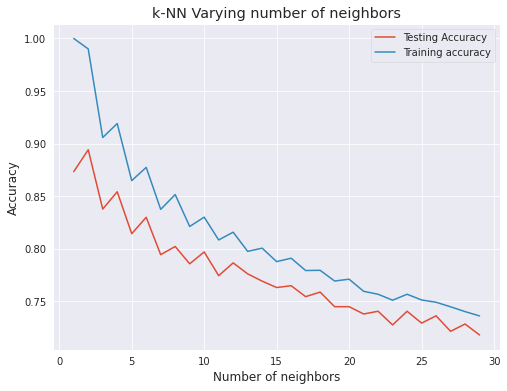

In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=bestPermet['n_neighbors'])

In [ ]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.score(X_test,y_test)

0.8940972222222222

In [ ]:
y_test_pred_knn = knn.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_test_pred_knn)

array([[470,  83],
       [ 39, 560]])

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [ ]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba)

In [ ]:
roc_auc_score(y_test,y_pred_proba)

0.9088716275166265

In [ ]:
f1_score(y_test, y_test_pred_knn)

0.9017713365539454

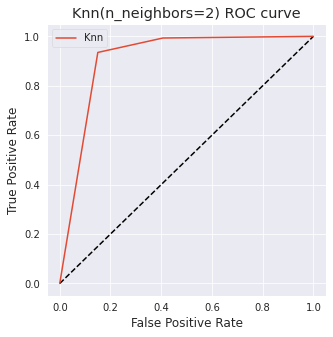

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_knn,tpr_knn, label='Knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn(n_neighbors=2) ROC curve')
plt.legend()
plt.show()

##SVM

In [ ]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(round(svc_classifier.score(X_test, y_test),2))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

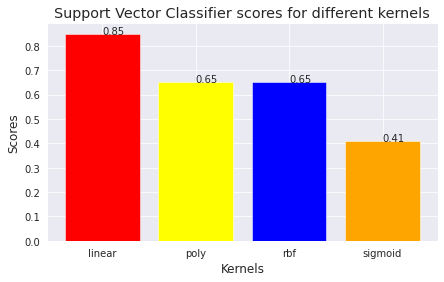

In [ ]:
# colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.figure(figsize=(7,4))
plt.bar(kernels, svc_scores,color=['red', 'yellow', 'blue', 'orange'])
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [ ]:
svm=SVC(probability=True)
svm.fit(X_train,y_train)

SVC(probability=True)

In [ ]:
y_svm_predi=svm.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_svm_predi)

array([[349, 204],
       [194, 405]])

In [ ]:
y_svm_predict_pro=svm.predict_proba(X_test)[:,1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_svm_predict_pro)

In [ ]:
roc_auc_score(y_test,y_svm_predict_pro)

0.7017905067819482

In [ ]:
f1_score (y_test, y_svm_predi)

0.6705298013245032

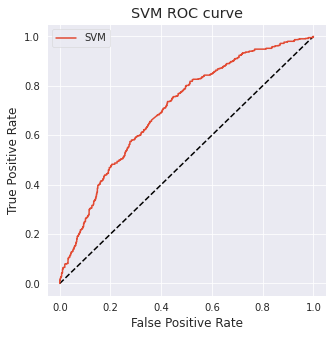

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_svm,tpr_svm, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC curve')
plt.legend()
plt.show()

## cat boost

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 15 kB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
catboost=CatBoostClassifier(iterations=100,learning_rate=0.03)

In [ ]:
catboost.fit(X_train,y_train,verbose=10)

0:	learn: 0.6715146	total: 51.2ms	remaining: 5.07s
10:	learn: 0.4975295	total: 96.5ms	remaining: 781ms
20:	learn: 0.4306259	total: 144ms	remaining: 543ms
30:	learn: 0.3967764	total: 187ms	remaining: 415ms
40:	learn: 0.3728525	total: 228ms	remaining: 328ms
50:	learn: 0.3621336	total: 278ms	remaining: 267ms
60:	learn: 0.3529718	total: 320ms	remaining: 205ms
70:	learn: 0.3451975	total: 363ms	remaining: 148ms
80:	learn: 0.3376334	total: 401ms	remaining: 94.1ms
90:	learn: 0.3312222	total: 441ms	remaining: 43.6ms
99:	learn: 0.3258459	total: 483ms	remaining: 0us


In [ ]:
y_catboost_pred=catboost.predict(X_test)
y_catboost_pre_prob=catboost.predict_proba(X_test)[:,1]

In [ ]:
catboost.score(X_test,y_test)

0.8385416666666666

In [ ]:
confusion_matrix(y_test,y_catboost_pred)

array([[534,  19],
       [167, 432]])

In [ ]:
roc_auc_score(y_test,y_catboost_pre_prob)

0.9169350967706877

In [ ]:
fpr_cat, tpr_cat, thresholds_cat = roc_curve(y_test, y_catboost_pre_prob)

In [ ]:
f1_score(y_test, y_catboost_pred)

0.822857142857143

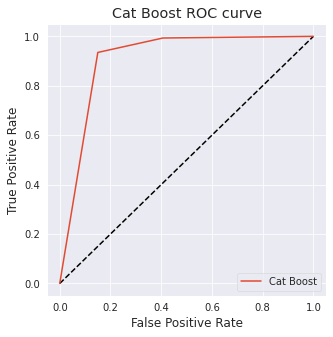

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Cat Boost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cat Boost ROC curve')
plt.legend()
plt.show()

In [ ]:
train_x_ = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

##LIGHTGBM

In [ ]:
import lightgbm as lgb

In [ ]:
lightGBM = lgb.LGBMClassifier(silent=False)

In [ ]:
#cv different parameter
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lightGBM, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)


In [ ]:
light_boost = grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [ ]:
light_boost.best_estimator_


LGBMClassifier(max_depth=50, n_estimators=200, num_leaves=300, silent=False)

In [ ]:
y_light_gbm_pred = light_boost.predict(X_test)
y_light_gbm_pre_prob = light_boost.predict_proba(X_test)[:,1]

In [ ]:
light_boost.score(X_test,y_test)

0.9553535579190151

In [ ]:
confusion_matrix(y_test,y_light_gbm_pred )

array([[526,  27],
       [ 84, 515]])

In [ ]:
roc_auc_score(y_test,y_light_gbm_pre_prob)

0.9553535579190151

In [ ]:
f1_score(y_test, y_light_gbm_pred)

0.9027169149868537

In [ ]:
fpr_lGBM, tpr_lGBM, thresholds_lGBM = roc_curve(y_test, y_light_gbm_pre_prob)

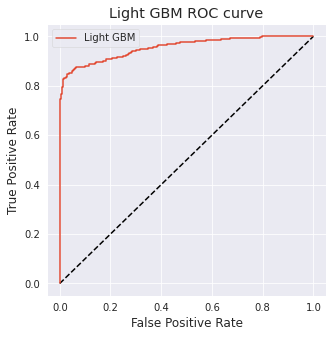

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_lGBM,tpr_lGBM, label='Light GBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Light GBM ROC curve')
plt.legend()
plt.show()

# model performance

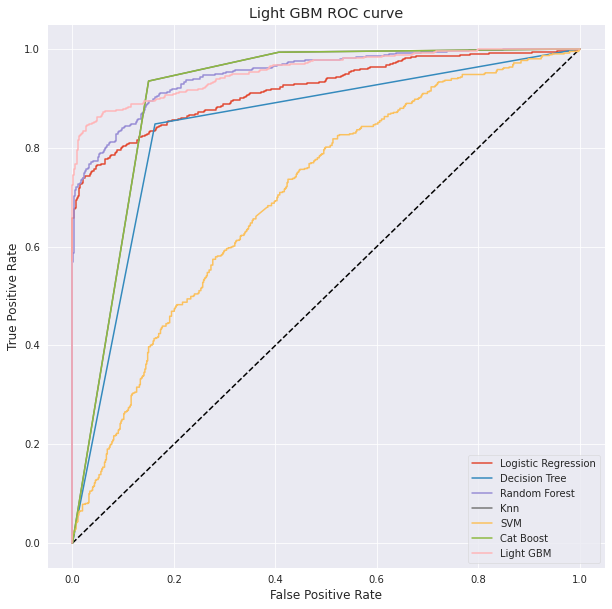

In [ ]:
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_lr,tpr_lr, label='Logistic Regression')
plt.plot(fpr_dt,tpr_dt, label='Decision Tree')
plt.plot(fpr_rf,tpr_rf, label='Random Forest')
plt.plot(fpr_knn,tpr_knn, label='Knn')
plt.plot(fpr_svm,tpr_svm, label='SVM')
plt.plot(fpr,tpr, label='Cat Boost')
plt.plot(fpr_lGBM,tpr_lGBM, label='Light GBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Light GBM ROC curve')
plt.legend()
plt.show()